# Titanic Survival Claaification

### Importing Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.simplefilter("ignore")

### Read Dataset

In [2]:
dataset=pd.read_csv("C:/Users/reddy/OneDrive/Desktop/pantech/titanic.csv")

In [3]:
dataset.head().style.set_properties(**{'background-color':'yellow'})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


In [4]:
dataset.tail().style.set_properties(**{'background-color':'yellow'})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.000000,nan,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.450000,nan,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.000000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.750000,nan,Q


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Checking Null Values

In [7]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Dropping Columns

In [8]:
dataset.drop(columns =['Cabin', 'Name','Ticket','PassengerId'],inplace=True)

In [9]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
dataset['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [11]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Visualization

<AxesSubplot:>

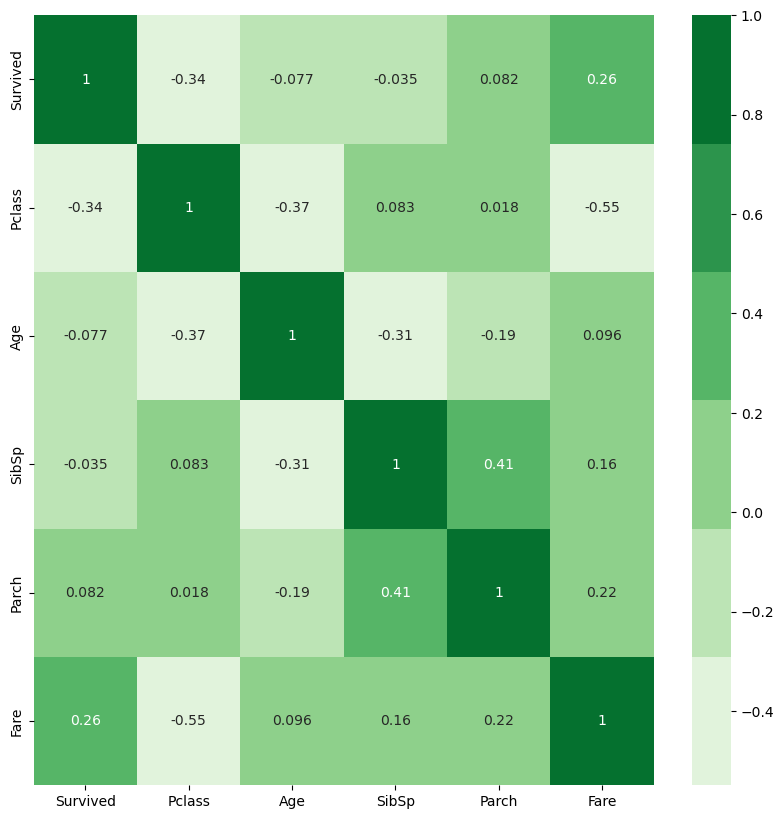

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True,cmap=sns.color_palette("Greens"))

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

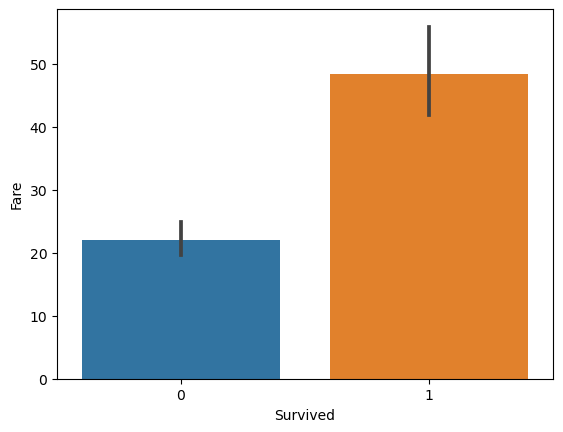

In [13]:
sns.barplot(y=dataset['Fare'],x=dataset["Survived"])

<AxesSubplot:ylabel='Survived'>

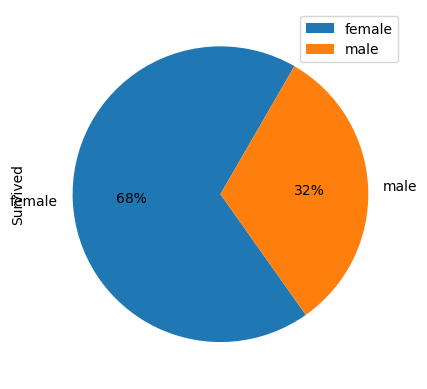

In [14]:
dataset.groupby(["Sex"]).sum().plot(kind='pie',y='Survived', autopct='%1.0f%%', startangle=60)

### Replacing Null Values

In [15]:
dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())
dataset['Embarked']=dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [16]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


### Changing String to Categorial(encoding)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
dataset['Sex']=le.fit_transform(dataset['Sex'])
dataset['Embarked']=le.fit_transform(dataset['Embarked'])
#astype('category')
#dataset['Sex']=dataset['Sex'].cat.code

In [21]:
dataset['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [22]:
dataset['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [23]:
dataset['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [24]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [25]:
x=dataset.iloc[:,1:]

In [26]:
y=dataset['Survived']

In [27]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [28]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Spliting Dataset

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [31]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
499,3,1,24.000000,0,0,7.7958,2
707,1,1,42.000000,0,0,26.2875,2
112,3,1,22.000000,0,0,8.0500,2
780,3,0,13.000000,0,0,7.2292,0
712,1,1,48.000000,1,0,52.0000,2
...,...,...,...,...,...,...,...
421,3,1,21.000000,0,0,7.7333,1
161,2,0,40.000000,0,0,15.7500,2
862,1,0,48.000000,0,0,25.9292,2
294,3,1,24.000000,0,0,7.8958,2


In [32]:
y_train

499    0
707    1
112    0
780    1
712    1
      ..
421    0
161    1
862    1
294    0
82     1
Name: Survived, Length: 668, dtype: int64

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr=LogisticRegression()

In [35]:
model1=lr.fit(x_train,y_train)

In [36]:
y1_pred=lr.predict(x_test)

In [37]:
y1_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [39]:
accuracyscore=accuracy_score(y_test,y1_pred)
print('accuracyscore of logisticregression:',accuracyscore)

accuracyscore of logisticregression: 0.7847533632286996


In [40]:
print('confusion matrix of logisticregression:',confusion_matrix(y1_pred,y_test))

confusion matrix of logisticregression: [[117  31]
 [ 17  58]]


In [41]:
print('classification report of logistic regression:',classification_report(y1_pred,y_test))

classification report of logistic regression:               precision    recall  f1-score   support

           0       0.87      0.79      0.83       148
           1       0.65      0.77      0.71        75

    accuracy                           0.78       223
   macro avg       0.76      0.78      0.77       223
weighted avg       0.80      0.78      0.79       223



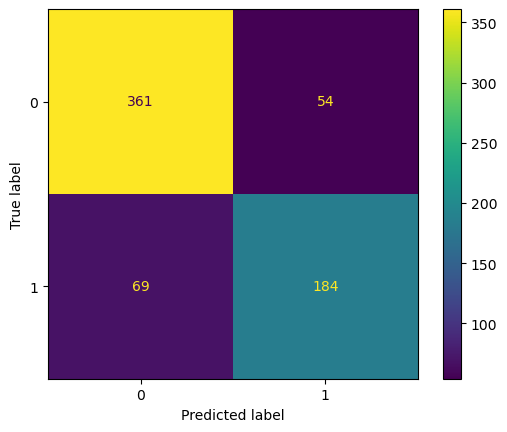

In [42]:
plot_confusion_matrix(model1,x_train,y_train)

### Naive_Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
nv= GaussianNB()

In [45]:
model2=nv.fit(x_train,y_train)

In [46]:
y2_pred=nv.predict(x_test)

In [47]:
accuracy_score(y_test,y2_pred)

0.7847533632286996

### KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier 

In [49]:
knn=KNeighborsClassifier(n_neighbors=25)

In [50]:
model3=knn.fit(x_train,y_train)

In [51]:
y3_pred=knn.predict(x_test)

In [52]:
accuracy_score(y_test,y3_pred)

0.672645739910314

### AdoBoostClassifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
abc=AdaBoostClassifier()

In [55]:
model4=abc.fit(x_train,y_train)

In [56]:
y4_pred=abc.predict(x_test)

In [57]:
accuracy_score(y_test,y4_pred)

0.7892376681614349

Text(0, 0.5, 'y_pred')

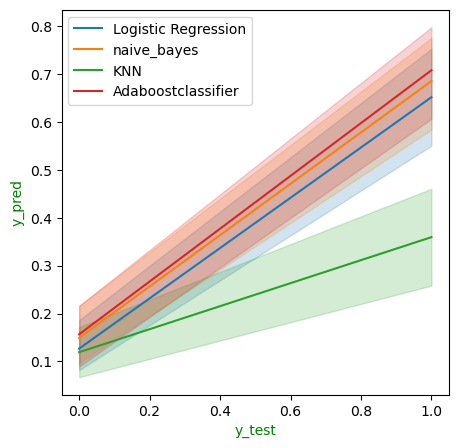

In [58]:
fig, ax = plt.subplots(figsize=(5,5,))  
ax = sns.lineplot(x=y_test, y=y1_pred,label='Logistic Regression')
ax1 = sns.lineplot(x=y_test, y=y2_pred,label='naive_bayes')
ax1 = sns.lineplot(x=y_test, y=y3_pred,label='KNN')
ax1 = sns.lineplot(x=y_test, y=y4_pred,label='Adaboostclassifier')
ax.set_xlabel('y_test',color="g")
ax.set_ylabel('y_pred',color='g')

